In [1]:
import scanpy as sc
import pandas as pd
import scvi
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix

c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read Old Adata_Integrate_Raw

c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [263]:
## Load Trained Model

In [ ]:
adata_integrate_raw = sc.read_h5ad('adata_integrate_raw.h5ad')
scvi.model.SCVI.setup_anndata(adata_integrate_raw, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])
## save model after training finish
dir_path = 'C:\\Na\\DFU_Project\\Model' 
model = scvi.model.SCVI.load(dir_path, adata_integrate_raw)
adata_integrate_raw.write_h5ad('adata_integrate_raw.h5ad')

In [68]:
model = scvi.model.SCVI(adata_integrate_raw)


In [63]:
markers = sc.get.rank_genes_groups_df(adata_integrate_raw, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,TAGLN,109.931839,4.162661,0.000000,0.000000
1,0,IGFBP7,104.532097,2.969075,0.000000,0.000000
2,0,CALD1,92.736099,2.586630,0.000000,0.000000
3,0,ADIRF,92.344772,2.650169,0.000000,0.000000
4,0,MYL9,91.283623,3.149121,0.000000,0.000000
...,...,...,...,...,...,...
412061,34,OST4,2.141161,0.572079,0.034567,0.047805
412062,34,MLPH,2.136176,2.394136,0.034986,0.048358
412063,34,FARS2,2.133629,1.784558,0.035199,0.048630
412064,34,NDST2,2.124746,4.014741,0.035954,0.049629


In [69]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 35/35 [08:54<00:00, 15.27s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
HPS4,0.8806,0.1194,1.998124,0.000136,0.000140,0.0,0.25,-0.051629,-0.075938,2.237412,...,0.070457,0.107833,0.068027,0.096890,0.187197,0.213880,False,0 vs Rest,0,Rest
MCM6,0.8784,0.1216,1.977365,0.000133,0.000127,0.0,0.25,0.022133,0.078336,1.880205,...,0.027697,0.044524,0.027697,0.039518,0.066248,0.073811,False,0 vs Rest,0,Rest
ZBED5,0.8756,0.1244,1.951407,0.000117,0.000112,0.0,0.25,0.022136,0.075795,1.812768,...,0.087464,0.121434,0.078717,0.109295,0.224227,0.216075,False,0 vs Rest,0,Rest
IL3RA,0.8678,0.1322,1.881645,0.000102,0.000101,0.0,0.25,0.024684,0.070145,1.569812,...,0.007775,0.069511,0.005831,0.043860,0.009623,0.139571,False,0 vs Rest,0,Rest
TMEM144,0.8666,0.1334,1.871225,0.000129,0.000132,0.0,0.25,-0.053918,-0.068382,1.905349,...,0.001458,0.018386,0.001458,0.017943,0.002547,0.031320,False,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNFRSF14,0.0354,0.9646,-3.305001,0.000079,0.000080,0.0,0.25,-0.048177,-0.000242,0.412657,...,0.018868,0.153686,0.018868,0.130077,0.321035,0.316131,False,34 vs Rest,34,Rest
ACOT13,0.0350,0.9650,-3.316780,0.000093,0.000096,0.0,0.25,-0.062158,-0.027328,0.396919,...,0.028302,0.180517,0.028302,0.148711,0.464487,0.287941,False,34 vs Rest,34,Rest
SYCP2,0.0346,0.9654,-3.328689,0.000091,0.000093,0.0,0.25,-0.052122,-0.003421,0.398840,...,0.009434,0.012274,0.009434,0.011132,0.174058,0.026728,False,34 vs Rest,34,Rest
AFAP1L2,0.0344,0.9656,-3.334693,0.000091,0.000093,0.0,0.25,-0.056157,-0.015148,0.402274,...,0.000000,0.042040,0.000000,0.037881,0.000000,0.083416,False,34 vs Rest,34,Rest


In [70]:
markers_scvi_filled = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi_filled

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2


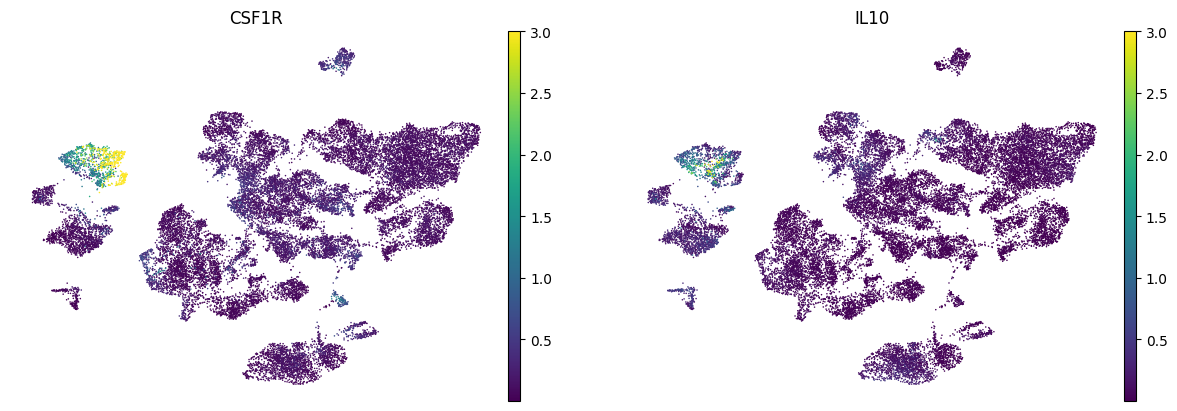

In [241]:
sc.pl.umap(adata_integrate_raw, color = ['CSF1R', 'IL10'], frameon = False, layer = 'scvi_normalized', vmax =3
)

In [171]:
markerS[markers == "23"]

NameError: name 'markerS' is not defined

In [ ]:
{cell type "0":"SMC",
"1":"SMC",
"2":"VasEndo",
"3":"BasalKera",
"4":"T cell",
"5":"",
"6":"Fibroblast",
"7":"Fibroblast",
"8":"M1+M2 macrophage",
"9":"BasalKera",
"10":"SMC",
"11":"SMC",
"12":"Fibroblast",
"13":"SMC",
"14":"BasalKera",
"15":"Fibroblast",
"16":"Fibroblast",
"17":"",
"18":"VasEndo",
"19":"",
"20":"BasalKera",
"21":"SMC",
"22":"BasalKera",
"23":"",
"24":" ",
"25":"SMC",
"26":"",
"27":"",
"28":"BasalKera",
"29":"LymphEndo",
"30":"SMC",
"31":"Fibroblast",
"32":"Plasma",
"33"
"34": "Mast",}

In [172]:
markers = sc.get.rank_genes_groups_df(adata_integrate_raw, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,TAGLN,109.931839,4.162661,0.000000,0.000000
1,0,IGFBP7,104.532097,2.969075,0.000000,0.000000
2,0,CALD1,92.736099,2.586630,0.000000,0.000000
3,0,ADIRF,92.344772,2.650169,0.000000,0.000000
4,0,MYL9,91.283623,3.149121,0.000000,0.000000
...,...,...,...,...,...,...
412061,34,OST4,2.141161,0.572079,0.034567,0.047805
412062,34,MLPH,2.136176,2.394136,0.034986,0.048358
412063,34,FARS2,2.133629,1.784558,0.035199,0.048630
412064,34,NDST2,2.124746,4.014741,0.035954,0.049629


In [256]:
sc.tl.umap(adata_integrate_raw)
sc.tl.leiden(adata_integrate_raw, resolution = 1)

c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


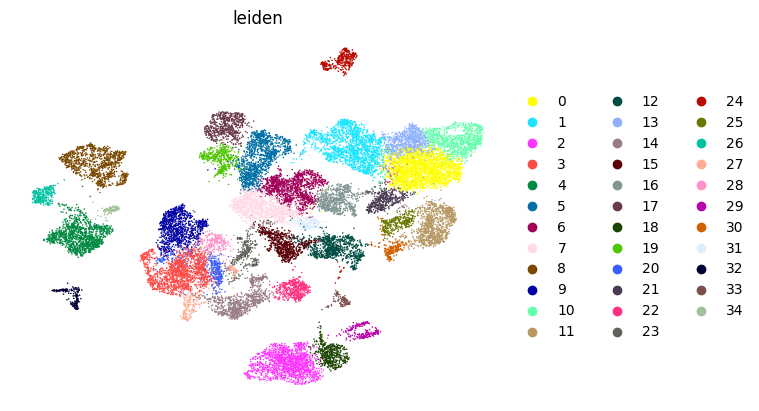

In [261]:
sc.pl.umap(adata_integrate_raw, color = ['leiden'], frameon = False)


c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


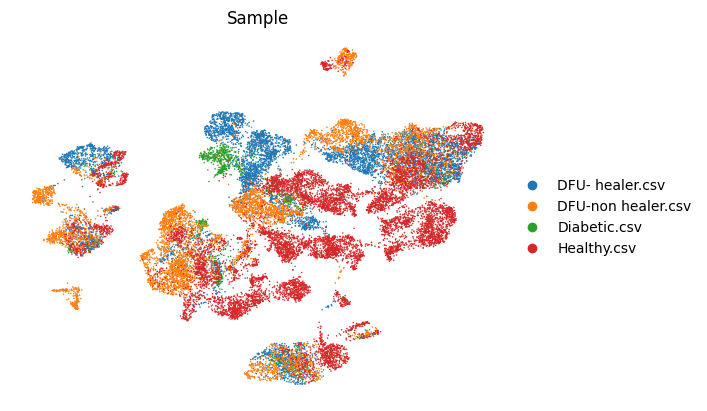

In [262]:
sc.pl.umap(adata_integrate_raw, color = ['Sample'], frameon = False)

c:\Users\thoca\anaconda3\envs\scRNAseq_Env2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


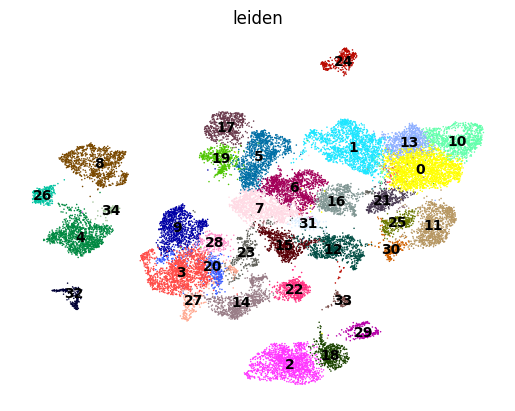

In [260]:
sc.pl.umap(adata_integrate_raw, color = ['leiden'], frameon = False, legend_loc = "on data")